In [1]:
import pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential, load_model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Using TensorFlow backend.


In [2]:
pd.set_option('display.max_colwidth', 140)

tweets_text = pd.read_csv("dataset_3.txt", sep='\t', header=None)
tweets_text.columns = ['Text','Label']

print("Out of {} rows, {} are spams, {} are non-spams".format(len(tweets_text),
                                                              len(tweets_text[tweets_text['Label']=='Spam']),
                                                              len(tweets_text[tweets_text['Label']=='Ham'])))

Out of 4841788 rows, 2277405 are spams, 2564383 are non-spams


In [3]:
# Convert labels to numeric format
tweets_text['Label'] = np.where(tweets_text['Label']=='Spam',1,0)

X_train, X_test, y_train, y_test = train_test_split(tweets_text['Text'], tweets_text['Label'], 
                                                    test_size=0.01, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.010101, random_state=2)

In [4]:
# Convert labels to numpy arrays
y_train = y_train.values
y_test = y_test.values
y_val = y_val.values

In [5]:
#Load the tokenizer
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

print("Number of vocabulary: {}".format(len(tokenizer.word_index)))

Number of vocabulary: 45164


In [6]:
def text_processing(data):
    seq = tokenizer.texts_to_sequences(data)
    seq_pad = pad_sequences(seq, maxlen=46, padding='pre')
    return seq_pad

In [7]:
X_test_seq_padded = text_processing(X_test)
X_val_seq_padded = text_processing(X_val)

In [8]:
tf.random.set_seed(1234)
model = load_model('rnn_3.hdf5')
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 46, 50)            2258250   
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                10624     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 2,269,963
Trainable params: 2,269,963
Non-trainable params: 0
_________________________________________________________________


C:\Users\Yirong\miniconda3\envs\python36_for_tensorflow\lib\site-packages\keras\engine\saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [9]:
test_loss, test_acc = model.evaluate(X_test_seq_padded, y_test, batch_size=1, verbose=1)

print("Test Accuracy: {}".format(round(test_acc,3)))
print("Test Loss: {}".format(round(test_loss,3)))

48418/48418 [==============================] - 473s 10ms/step
Test Accuracy: 0.814
Test Loss: 0.427


In [10]:
y_pred = (model.predict(X_test_seq_padded)>0.5).astype("int32")

print("Accuracy: {}".format(round(accuracy_score(y_test, y_pred),3)))
print("Precision: {}".format(round(precision_score(y_test, y_pred),3)))
print("Recall: {}".format(round(recall_score(y_test, y_pred),3)))
print("F-Measure: {}".format(round(f1_score(y_test, y_pred),3)))

Accuracy: 0.814
Precision: 0.835
Recall: 0.755
F-Measure: 0.793


In [11]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.87      0.83     25545
           1       0.84      0.76      0.79     22873

    accuracy                           0.81     48418
   macro avg       0.82      0.81      0.81     48418
weighted avg       0.82      0.81      0.81     48418



Text(0.5, 1, 'Confusion Matrix')

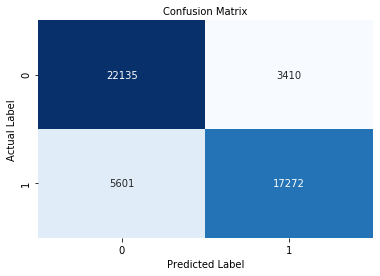

In [12]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cbar=False, cmap=plt.cm.Blues)
plt.ylabel('Actual Label', fontsize=10)
plt.xlabel('Predicted Label', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)

In [17]:
X_test.head()

4599039    ultimate fight say unrepentant silva make mockery of sport yahoo sport silva antic at locator
4319699                                        shop with and earn reward point for free lingerie locator
4282323                             stop wasting money on worthless lead get qualified lead free locator
2242802                                                                   the shape by the shape locator
4238344                                                                                   to get text to
Name: Text, dtype: object

In [18]:
y_pred[0:5]

array([[1],
       [1],
       [1],
       [1],
       [0]])

In [19]:
y_test[0:5]

array([1, 1, 1, 0, 1])

In [24]:
df_list = list(X_test.values)
df = pd.DataFrame(df_list, columns=["text"])
df["actual"] = y_test
df["predicted"] = y_pred

incorrect = df[df["actual"] != df["predicted"]]

In [25]:
incorrect

,text,actual,predicted
3,the shape by the shape locator,0,1
4,to get text to,1,0
19,holy mention wa blistering from the jump to da hump to the very end and what sell flawless,1,0
33,is if alcohol tonight is worth the consequence of the reaction tomorrow,1,0
39,my look so cute,1,0
...,...,...,...
48382,now on locator,0,1
48390,mention wisdom teeth,1,0
48391,ignite is tonight locator be there or be somewhere else,1,0
48397,don speak unless you can improve on the silence,0,1
